In [2]:
import sys
sys.path.append('../src')
from data_loading import *
from population_pyramid_helpers import *
from vehicle_type_helpers import *
from introduction_helpers import *
from map_france_helpers import *
from car_injuries_helpers import *

# Driving kills but can data help you survive

The goal of our data story will be to explore some key insights of the dataset by making a story about how to reduce your chance of dying in a road accident. By reading the story, the reader will be able to see what are the main factors of road accidents regarding different aspects about drivers (age, sexe, ..), places where accidents occurs (type of roads, departements, ..), moments when accidents occurs (during the year, month, day or with specific weather conditions) and security equipements (if the driver had its belt, the impact of security equipment on the gravity of the accident, ..).

At the end, the story will depict the "perfect" ride to avoid an accident by looking at the best possible case for each insight (the one having the less fatal accidents rate).

## Introduction

The goal of the introduction is to present key figures of the dataset.

### Number of accidents

In 10 years, from 2008 to 2018, the number of accident per year lies between 57783 (in 2018) and 76767 (in 2008). The general trend is a decrease in the number of accident per year with some increase every 4 years. 

#### Accidents per years

From 2008 to 2012, we notice that the number of accidents per year has been reduced linearly by 25% and then stabilizing around 60000 accidents per year until 2018. For a further study of this trend, we should look at the traffic regulations that have been done during years 2008 to 2012. 

In [2]:
df_accidents_per_year = get_number_accidents_per_years(2008, 2018)

/Users/sinitame/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df_accidents_per_year

2008    76767
2009    74409
2010    69379
2011    66974
2012    62250
2013    58397
2014    59854
2015    58654
2016    59432
2017    60701
2018    57783
dtype: int64

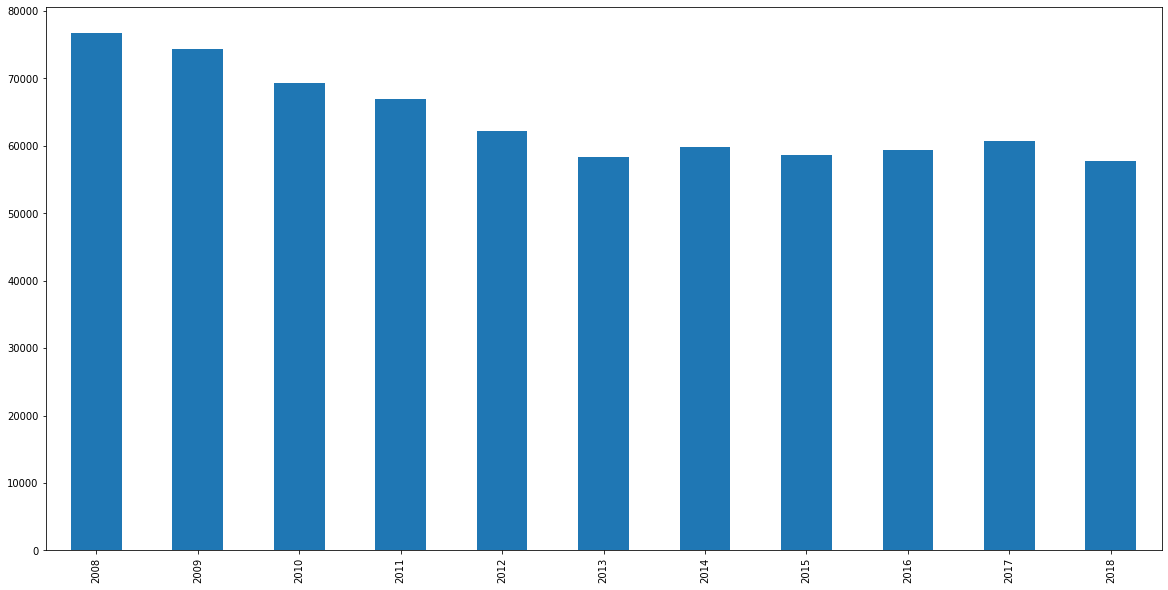

In [4]:
plot_number_accidents_per_years(df_accidents_per_year)

#### Accidents per months

We plotted the monthly distribution of accidents in the most recent year provided (2018). The number of accidents lays between 3458 accidents in February and 5698 accidents in October. Two main spikes can be noticed, one around the summer holidays (May to July) and one around the back-to-school period. Let us see if this trend is generalized over the years. 

In [5]:
year = 2018
data_2018 = YearLoader(year)

/Users/sinitame/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [6]:
df_accidents_per_months_2018 = get_number_accidents_per_months(data_2018)

In [7]:
df_accidents_per_months_2018

Jan     4350
Feb     3458
Mar     4152
Apr     4833
May     5055
June    5579
July    5241
Aug     4336
Sept    5532
Oct     5698
Nov     4883
Dec     4666
dtype: int64

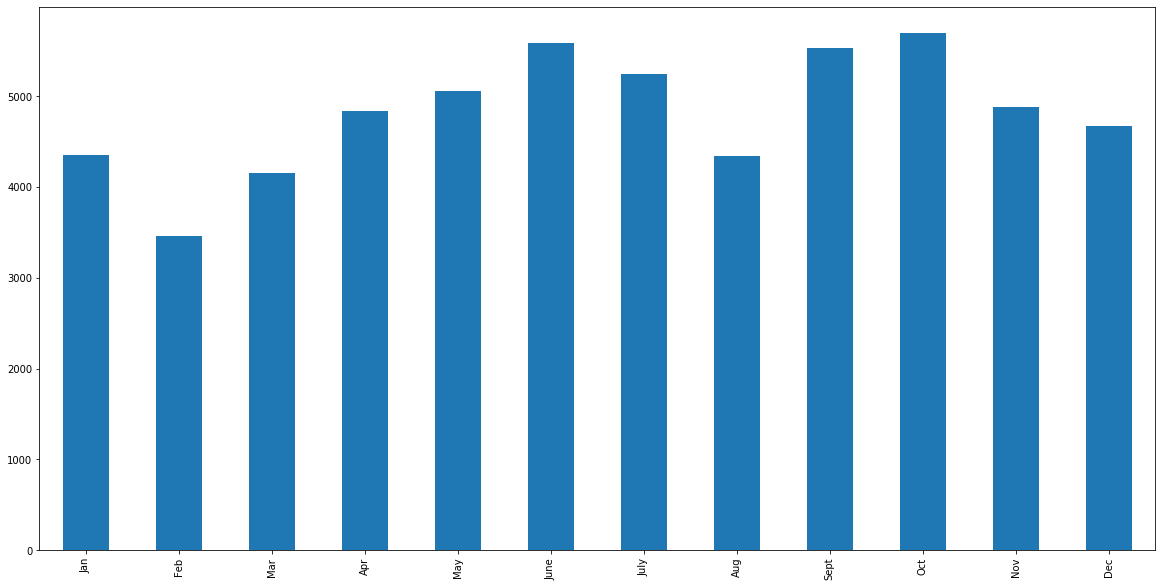

In [8]:
plot_number_accidents_per_months(df_accidents_per_months_2018)

### Evolution over the years

We notice that around the years, the above trend is repeated, with February being the month with the least accidents and October being the month with the most frequent ones.

In [9]:
df_all_accidents_per_months = get_number_accidents_per_months_all_years(2008, 2018)

/Users/sinitame/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


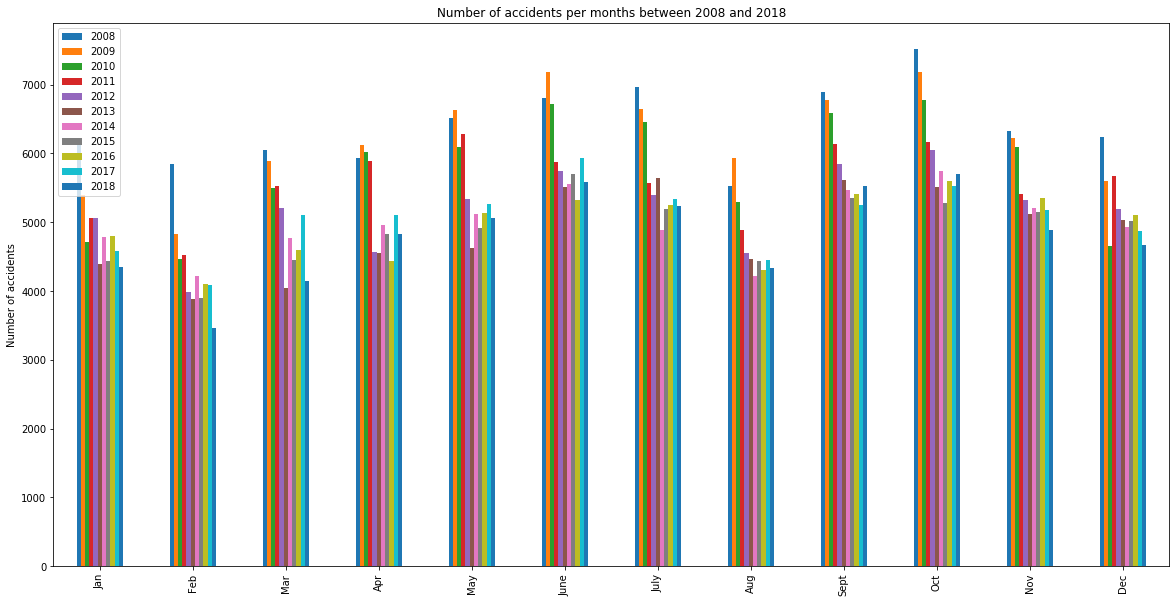

In [10]:
plot_all_years_accidents_per_months(df_all_accidents_per_months)

### Accidents gravity

The gravity of accidents is measured according to the level of damage done on humans (no damage (unscathed), slightly injured, injured, dead). The number of accidents in each class is inversely proportional to the level of damage (there are much more accidents where there has been no damage (around 60000 accidents/year) than the number of accidents where death has occurred (around 4000 accidents). The number of accidents related to death has been stable over the years. In the other classes (no damage and injury), the number of accidents follow the same trend : a clear decrease from 2008 to 2013, then a slight increase until 2018.

In [11]:
df_all_years_accidents_gravity = get_accidents_gravity_all_years(2008, 2018)

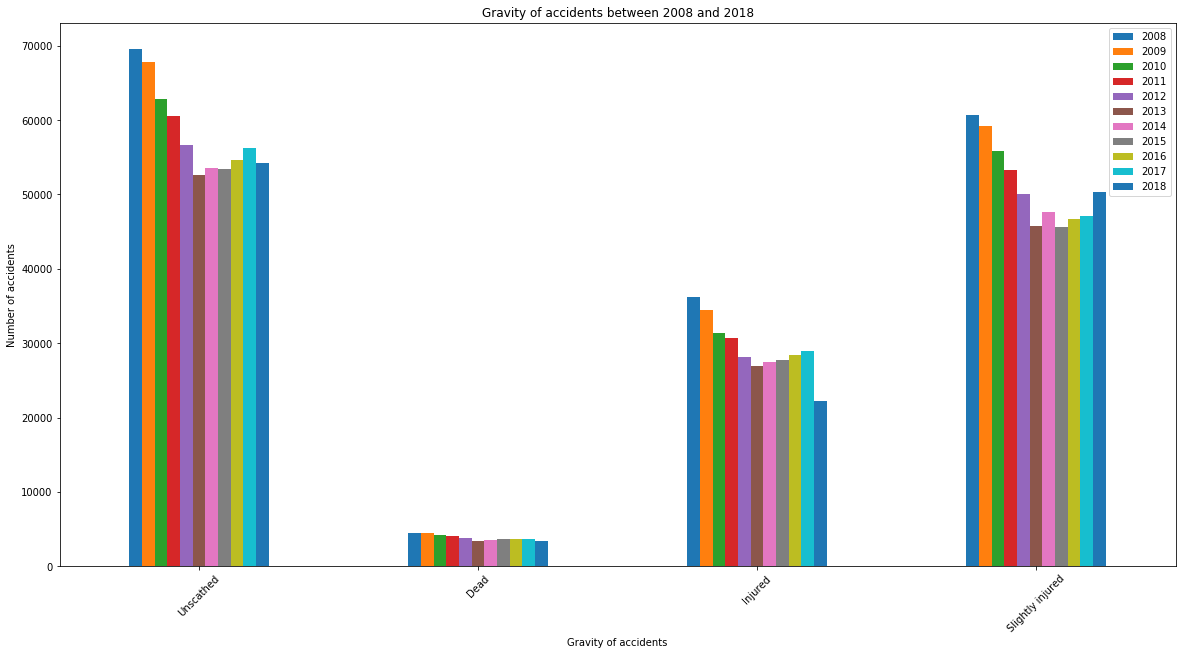

In [12]:
plot_all_years_accidents_gravity(df_all_years_accidents_gravity)

### Number of people per accidents

In [13]:
df_people_per_accidents_all = get_number_people_per_accidents_all_years(2008, 2018)

In [14]:
df_people_per_accidents_all.describe()

count    76767.000000
mean         2.226999
std          1.182808
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         58.000000
Name: Num_Acc, dtype: float64

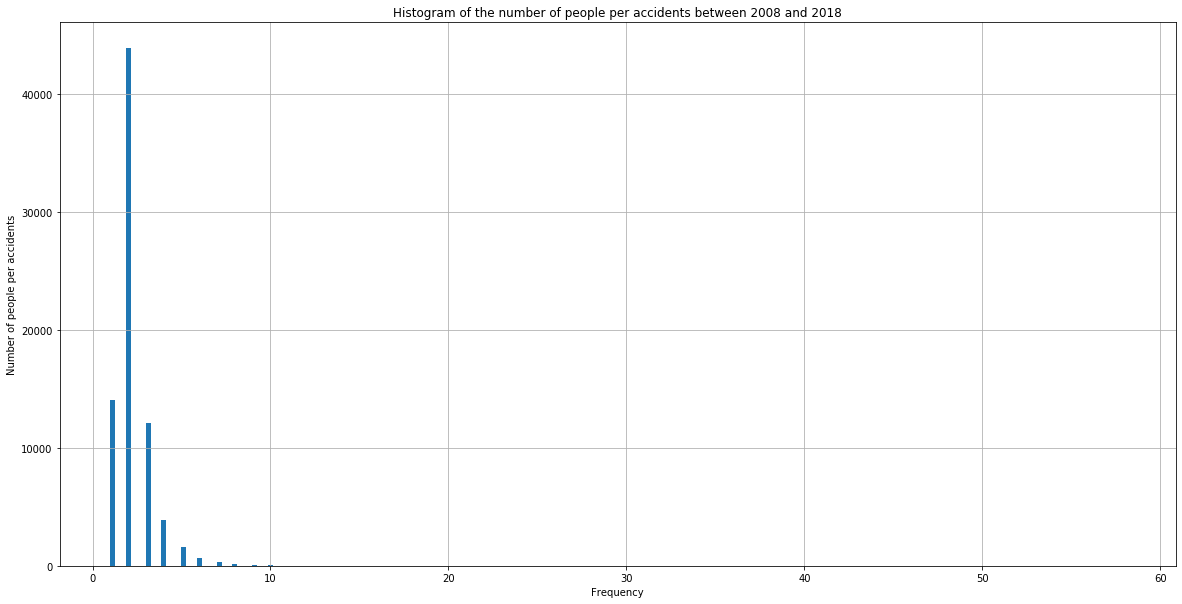

In [15]:
plot_number_people_per_accidents(df_people_per_accidents_all, multiple_years=True)

## 1. Be the right person ..

In [3]:
data_2018 = YearLoader(2018)
data_dead_alive = get_dead_alive_gender_df(data_2018)

data_dead_alive

/Users/ambroiserenaud/anaconda3/envs/ada/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,age_group,male_dead,male_alive,female_dead,female_alive
0,00-10,34,2283,25,1695
1,10-20,201,9258,59,4614
2,20-30,582,21350,116,9552
3,30-40,395,16570,77,6990
4,40-50,361,13621,67,5832
5,50-60,364,11273,73,5177
6,60-70,261,6086,92,3514
7,70-80,196,3238,103,2281
8,80-90,174,1636,136,1312
9,90-100,46,260,29,197


### Population Pyramids

As an example, population pyramids for year 2018 :

The men and woman pyramid shows that the 20-30 years old are the people that are the most prone to be involved in accidents. 70% of the whole population involved in accidents are male. 3% of the male population dies in these accidents. The female pyramid shows two spikes in the number of dead women : 15% of the overall dead women at 20-30 years old and another 15% at 80-90 years old. 

Male population pyramid (dead vs alive)

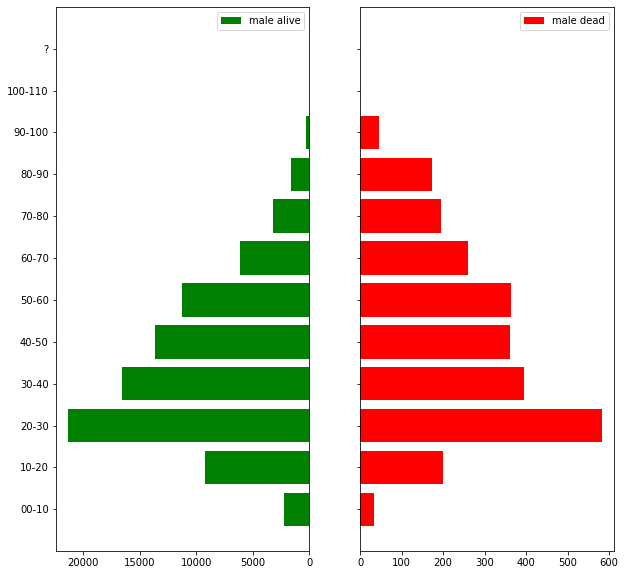

In [17]:
plot_pyramid_dead_alive_gender(data_dead_alive, male=True, figsize=(10,10), xlim = None)

Female drivers population pyramid (dead vs alive)

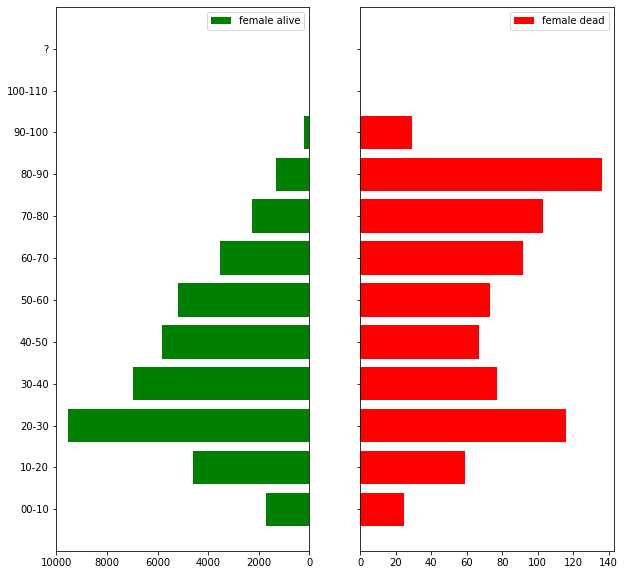

In [18]:
plot_pyramid_dead_alive_gender(data_dead_alive, male=False, female=True, figsize=(10,10), xlim = None)

### Types of vehicles

The graph distribution of vehicule types shows that the car is the vehicule where most accidents occur since 90% of the vehicules involved in accidents are cars. It is followed by the motorcycle with around 8% of overall number of vehicules.

In [10]:
data_vehicles = get_vehicles_type_df(data_2018, 8)

vehicles repartition over categories:

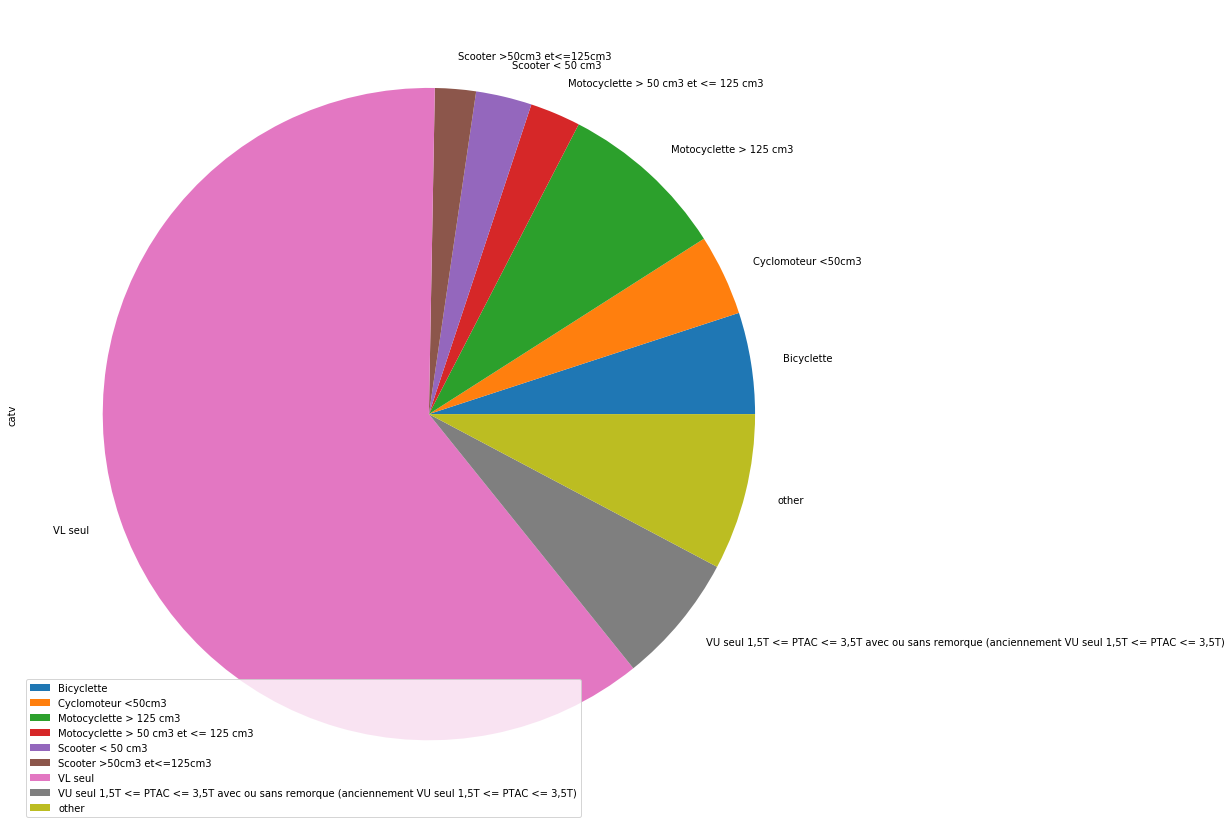

In [11]:
plot_vehicles_cat(data_vehicles, (15,15))

## 2. At the right place ..

### Accidents per regions/departments (map of France)

From this map, we observe that the French departments with the highest number of accidents are located where big cities are, where the population density is the biggest, for example around Paris and Marseille.

In [21]:
get_dep_count_df(data_2018)

,dep,count
0,75,5591
1,13,3413
2,93,2735
3,94,2548
4,92,2520
...,...,...
95,09,90
96,48,76
97,46,75
98,23,61


The map of france displaying accidents per departments is interactive

![SegmentLocal](map_france.gif "segment")

### Injured vizualization in the car (Heatmap from the car top -> TODO (data story milestone))

Car place number:
![car place](car.jpg)

All injuries :

In [5]:
get_car_injuries_df(data_2018, dead_only=False)

,place
1.0,96011
2.0,14465
3.0,2475
4.0,2049
9.0,1435
7.0,1297
8.0,688
5.0,610
6.0,179


Death only:

In [6]:
get_car_injuries_df(data_2018, dead_only=True)

,place
1.0,2411
2.0,318
9.0,37
7.0,34
4.0,33
3.0,29
8.0,14
5.0,7
6.0,1


## 3. At the right moment ..

### Trends histograms

### Weather conditions

### Road conditions

## 4. And keep it secure

### Security equipement usage

## Conclusion